In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv(r'banking-clients.csv')

In [3]:
df.head()

,Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
0,IND81288,Raymond Mills,24,34324,06-05-2019,Anthony Torres,American,Safety Technician IV,High,Jade,...,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,1,1,1
1,IND65833,Julia Spencer,23,42205,10-12-2001,Jonathan Hawkins,African,Software Consultant,High,Jade,...,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,2,1,2
2,IND47499,Stephen Murray,27,7314,25-01-2010,Anthony Berry,European,Help Desk Operator,High,Gold,...,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,3,2,3
3,IND72498,Virginia Garza,40,34594,28-03-2019,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,4,1,4
4,IND60181,Melissa Sanders,46,41269,20-07-2012,Shawn Long,American,Assistant Professor,Mid,Platinum,...,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,1,2,5


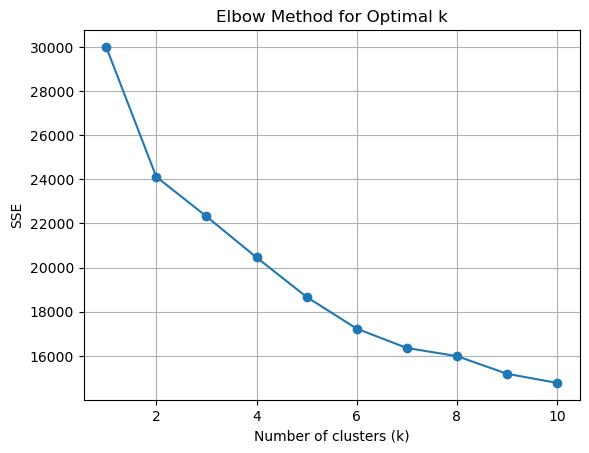

In [9]:
df['Joined Bank'] = pd.to_datetime(df['Joined Bank'], dayfirst=True, errors='coerce')

# Calculate Tenure in Years
df['TenureYears'] = ((pd.Timestamp.today() - df['Joined Bank']).dt.days / 365).round(2)

# Derived Metrics
df['Total_Deposit'] = df[[
    'Superannuation Savings',
    'Bank Deposits',
    'Checking Accounts',
    'Saving Accounts',
    'Foreign Currency Account'
]].sum(axis=1)

df['Total_Loan'] = df[['Business Lending','Credit Card Balance', 'Bank Loans']].sum(axis = 1)
df['DTI'] = (df['Credit Card Balance'] + df['Bank Loans']+df['Business Lending']) / df['Estimated Income']
df['LDR'] = df['Total_Loan'] / df['Total_Deposit']

# -----------------------------
# 3. Select features for clustering
# -----------------------------
features = [
    'Estimated Income', 'Credit Card Balance', 'Bank Loans', 'Bank Deposits',
    'Superannuation Savings', 'Amount of Credit Cards', 'TenureYears',
    'Risk Weighting', 'DTI', 'LDR'
]

df_model = df[features].copy()

# Handle missing or infinite values
#df_model = df_model.replace([float('inf'), -float('inf')], pd.NA).dropna()

# -----------------------------
# 4. Scale the features
# -----------------------------
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_model)

# -----------------------------
# 5. Elbow method to find optimal k
# -----------------------------
sse = []
k_rng = range(1, 11)
for k in k_rng:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_features)
    sse.append(km.inertia_)

plt.plot(k_rng, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# -----------------------------
# 6. Apply K-Means with chosen k
# -----------------------------
optimal_k = 4  # Replace with elbow result
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# -----------------------------
# 7. Export to CSV for Power BI
# -----------------------------
# df.to_csv('banking_with_clusters.csv', index=False)
# print("Clustering completed. File saved as 'banking_with_clusters.csv'.")

In [ ]:
kmeans = KMeans(n_clusters=4)
y = kmeans.fit_predict(df[['DTI','LDR']])
y

In [5]:
df['Cluster']

0       0
1       2
2       1
3       2
4       1
       ..
2995    2
2996    0
2997    0
2998    0
2999    0
Name: Cluster, Length: 3000, dtype: int32

In [10]:
df1 = df[df['Cluster']==0]
df2 = df[df['Cluster']==1]
df3 = df[df['Cluster']==2]
df4 = df[df['Cluster']==3]

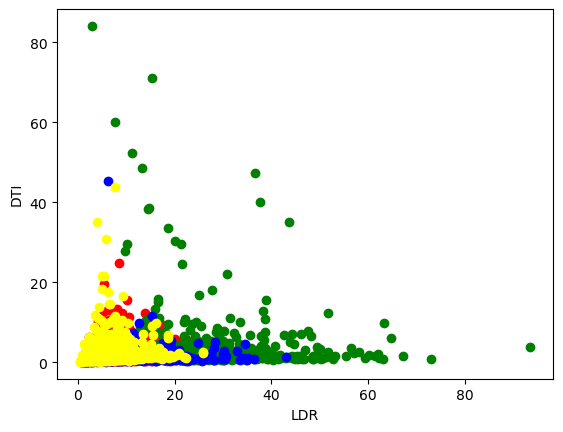

In [11]:
plt.scatter(df1.DTI,df1.LDR,color = 'red')
plt.scatter(df2.DTI,df2.LDR,color = 'green')
plt.scatter(df3.DTI,df3.LDR,color = 'blue')
plt.scatter(df4.DTI,df4.LDR,color = 'yellow')
plt.xlabel('LDR')
plt.ylabel('DTI')
plt.show()


In [17]:
df.columns

Index(['Client ID', 'Name', 'Age', 'Location ID', 'Joined Bank',
       'Banking Contact', 'Nationality', 'Occupation', 'Fee Structure',
       'Loyalty Classification', 'Estimated Income', 'Superannuation Savings',
       'Amount of Credit Cards', 'Credit Card Balance', 'Bank Loans',
       'Bank Deposits', 'Checking Accounts', 'Saving Accounts',
       'Foreign Currency Account', 'Business Lending', 'Properties Owned',
       'Risk Weighting', 'BRId', 'GenderId', 'IAId', 'TenureYears',
       'Total_Deposit', 'Total_Loan', 'DTI', 'LDR', 'Cluster'],
      dtype='object')

In [14]:
df.to_csv(r'banking_with_clusters.csv', index=False)